In [1]:
import numpy as np

import argparse, cv2, os, sys, math, random

from pathlib import *

from matplotlib import pyplot as plt

from PIL import Image

from scipy import ndimage

# pm, pg, pmm, pmg

In [2]:
# general function: 


def rec_crop(image,width,height): # crop a rectangular area 
    h,w = image.shape[:2]
    x=int(np.random.rand(1)*(w-width))
    y=int(np.random.rand(1)*(h-height))
    img_cropped = np.copy(image[y:y+height, x:x+width])
    return img_cropped

def translate_normal(image, W, H):
    (h,w)=image.shape[:2]
    times_H = int(H/h)+1
    times_W = int(W/w)+1  
    p1=image
    for j in range(1,times_H):
        p1=np.concatenate((p1,image))       
    p2=p1   
    for i in range(1,times_W):
        p2=np.concatenate((p2, p1),axis=1)   
    img_trans = p2[:H, :W] 
    return img_trans

# Specfic function:

In [3]:
# pm: 
def unit_pm_hori(img,W,H):
    h,w = img.shape[:2]
    
    times = int(math.log2(H/h)+1)
    for i in range (0, times):
        img_1=np.copy(img)
        img_2 = cv2.flip(img_1,0,dst=None) 
        img = np.vstack((img_1,img_2))
    img = img[:H,:,:]
    return img

def unit_pm_verti(img,W,H):
    h,w = img.shape[:2]
    
    times = int(math.log2(W/w)+1)
    for i in range (0, times):
        img_1=np.copy(img)
        img_2 = cv2.flip(img_1,1,dst=None) 
        img = np.hstack((img_1,img_2))
    img = img[:W,:,:]
    return img

def pm_horizontal(image,unit_w,unit_h,Width,Height):
    crop_pm = rec_crop(image,unit_w,unit_h)

    hori_unit = unit_pm_hori(crop_pm,Width,Height)
    img_hori = translate_normal(hori_unit,Width,Height)
    return img_hori

def pm_vertical(image,unit_w,unit_h,Width,Height):
    crop_pm = rec_crop(image,unit_w,unit_h)

    verti_unit = unit_pm_verti(crop_pm,Width,Height)
    img_verti = translate_normal(verti_unit,Width,Height)
    return img_verti

In [4]:
# pg:
def pg_hori(img,W,H):
    h,w = img.shape[:2]
    img_1=np.copy(img)
    
    times = int(W/w+1)
    for i in range (0, times):
        img_1 = cv2.flip(img_1,0,dst=None) 
        img = np.hstack((img,img_1))
    img = img[:W,:,:]
    return img

def pg_verti(img,W,H):
    h,w = img.shape[:2]
    img_1=np.copy(img)
    
    times = int(H/h+1)
    for i in range (0, times):
        img_1 = cv2.flip(img_1,1,dst=None) 
        img = np.vstack((img,img_1))
    img = img[:H,:,:]
    return img

def pg_horizontal(image,unit_w,unit_h,Width,Height):
    crop_pg=rec_crop(image,unit_w,unit_h)

    hori_unit_pg=pg_hori(crop_pg,Width,Height)
    img_hori_pg=translate_normal(hori_unit_pg,Width,Height)
    return img_hori_pg 

def pg_vertical(image,unit_w,unit_h,Width,Height):
    crop_pg=rec_crop(image,unit_w,unit_h)

    verti_unit_pg=pg_verti(crop_pg,Width,Height)
    img_verti_pg=translate_normal(verti_unit_pg,Width,Height)
    return img_verti_pg  

In [5]:
# pmm:
def pmm(image,unit_w,unit_h,Width,Height):
    crop = rec_crop(image, unit_w, unit_h)

    s1 = cv2.flip(crop,1,dst=None) 
    s2 = np.hstack((crop,s1))
    s3 = cv2.flip(s2,0,dst=None) 
    s4 = np.vstack((s2,s3))
    img_pmm = translate_normal(s4, Width, Height)
    return img_pmm

In [6]:
# pmg:
def pmg_horizontal(image,unit_w,unit_h,Width,Height):
    crop = rec_crop(image,unit_w,unit_h)
    h1 = np.rot90(crop,2)
    h2 = np.hstack((crop,h1))
    h3 = cv2.flip(h2,0,dst=None) 
    h4 = np.vstack((h2,h3))
    h5 = np.rot90(h4,2)
    h6 = np.hstack((h4,h5))
    img_pmg_h=translate_normal(h6,Width,Height)
    return img_pmg_h

def pmg_vertical(image,unit_w,unit_h,Width,Height):
    crop = rec_crop(image,unit_w,unit_h)
    v1 = np.rot90(crop,2)
    v2 = np.vstack((crop,v1))
    v3 = cv2.flip(v2,1,dst=None) 
    v4 = np.hstack((v2,v3))
    v5 = np.rot90(v4,2)
    v6 = np.vstack((v4,v5))
    img_pmg_v=translate_normal(v6,Width,Height)
    return img_pmg_v

# Validate with image sample

In [7]:
import cv2, math, os, random
import numpy as np
import matplotlib.pyplot as plt

# Load image

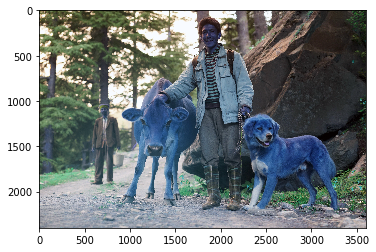

In [8]:
# use image samples for demontration
ori = cv2.imread('/home/yig319/Dropbox/wallpaper_group_generator/Original_images/dog-park.png') 
image1 = np.copy(ori) # load image used to crop and transform
imgplot = plt.imshow(image1)

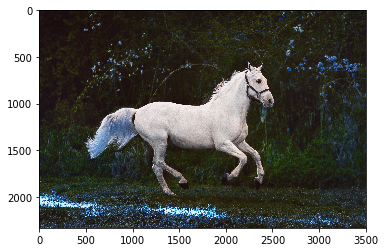

In [9]:
# use image samples for demontration
ori = cv2.imread('/home/yig319/Dropbox/wallpaper_group_generator/Original_images/horse.png') 
image2 = np.copy(ori) # load image used to crop and transform
imgplot = plt.imshow(image2)

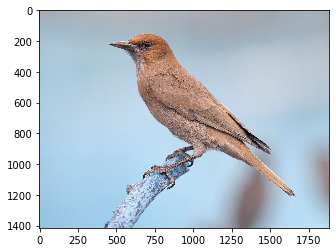

In [10]:
# use image samples for demontration
ori = cv2.imread('/home/yig319/Dropbox/wallpaper_group_generator/Original_images/bird.png') 
image3 = np.copy(ori) # load image used to crop and transform
imgplot = plt.imshow(image3)

# Set image size

In [11]:
#set output image size 
width, height = (256, 256)

# use random size and angle as croped part of image
angle = random.randint(30,85)
unit_h = random.randint(20,80)
lower_bound_w = int(unit_h/math.tan(math.radians(angle)))
if lower_bound_w > 65:
    unit_w = random.randint(lower_bound_w+15, lower_bound_w+75)
else: 
    unit_w = random.randint(lower_bound_w+15, 85)
    
# width, length, angle of unit cell:
unit_w, unit_h, angle

(58, 60, 65)

# Transform

In [12]:
pm_1 = pm_horizontal(image1,unit_w,unit_h,width,height)
pm_2 = pm_vertical(image1,unit_w,unit_h,width,height)

pg_1 = pg_horizontal(image1,unit_w,unit_h,width,height) 
pg_2 = pg_vertical(image1,unit_w,unit_h,width,height)

pmm_1 = pmm(image1,unit_w,unit_h,width,height)

pmg_1 = pmg_horizontal(image1,unit_w,unit_h,width,height)
pmg_2 = pmg_vertical(image1,unit_w,unit_h,width,height)

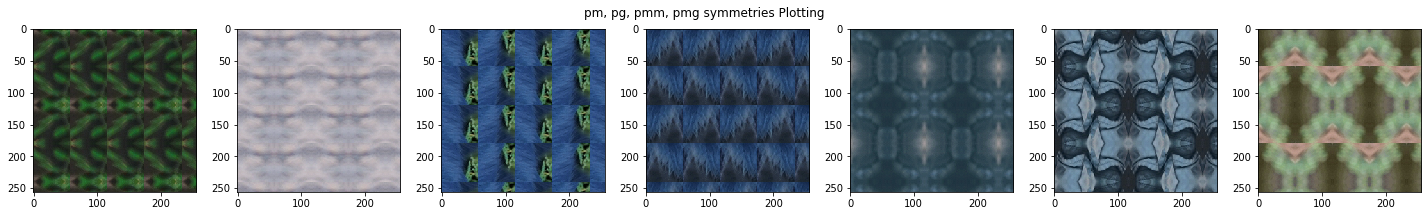

In [13]:
plt.figure(figsize=(25, 3))
plt.subplot(171)
plt.imshow(pm_1)
plt.subplot(172)
plt.imshow(pm_2)
plt.subplot(173)
plt.imshow(pg_1)
plt.subplot(174)
plt.imshow(pg_2)
plt.subplot(175)
plt.imshow(pmm_1)
plt.subplot(176)
plt.imshow(pmg_1)
plt.subplot(177)
plt.imshow(pmg_2)
plt.suptitle('pm, pg, pmm, pmg symmetries Plotting')
plt.show()

In [14]:
pm_1 = pm_horizontal(image2,unit_w,unit_h,width,height)
pm_2 = pm_vertical(image2,unit_w,unit_h,width,height)

pg_1 = pg_horizontal(image2,unit_w,unit_h,width,height) 
pg_2 = pg_vertical(image2,unit_w,unit_h,width,height)

pmm_1 = pmm(image2,unit_w,unit_h,width,height)

pmg_1 = pmg_horizontal(image2,unit_w,unit_h,width,height)
pmg_2 = pmg_vertical(image2,unit_w,unit_h,width,height)

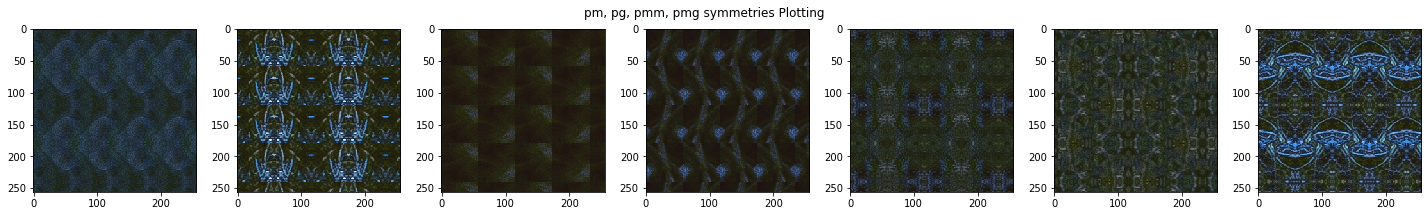

In [15]:
plt.figure(figsize=(25, 3))
plt.subplot(171)
plt.imshow(pm_1)
plt.subplot(172)
plt.imshow(pm_2)
plt.subplot(173)
plt.imshow(pg_1)
plt.subplot(174)
plt.imshow(pg_2)
plt.subplot(175)
plt.imshow(pmm_1)
plt.subplot(176)
plt.imshow(pmg_1)
plt.subplot(177)
plt.imshow(pmg_2)
plt.suptitle('pm, pg, pmm, pmg symmetries Plotting')
plt.show()

In [16]:
pm_1 = pm_horizontal(image3,unit_w,unit_h,width,height)
pm_2 = pm_vertical(image3,unit_w,unit_h,width,height)

pg_1 = pg_horizontal(image3,unit_w,unit_h,width,height) 
pg_2 = pg_vertical(image3,unit_w,unit_h,width,height)

pmm_1 = pmm(image3,unit_w,unit_h,width,height)

pmg_1 = pmg_horizontal(image3,unit_w,unit_h,width,height)
pmg_2 = pmg_vertical(image3,unit_w,unit_h,width,height)

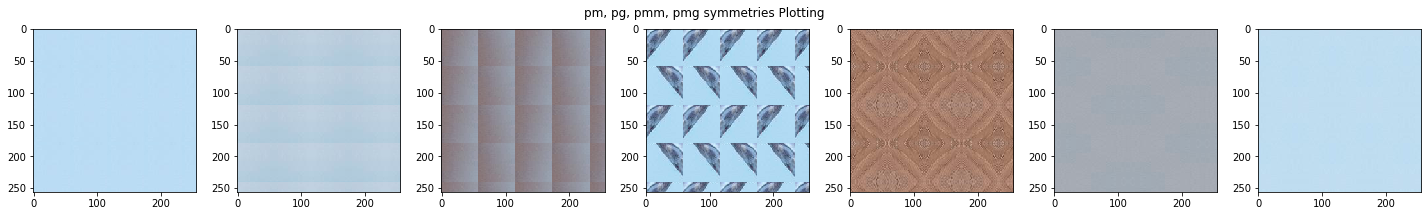

In [17]:
plt.figure(figsize=(25, 3))
plt.subplot(171)
plt.imshow(pm_1)
plt.subplot(172)
plt.imshow(pm_2)
plt.subplot(173)
plt.imshow(pg_1)
plt.subplot(174)
plt.imshow(pg_2)
plt.subplot(175)
plt.imshow(pmm_1)
plt.subplot(176)
plt.imshow(pmg_1)
plt.subplot(177)
plt.imshow(pmg_2)
plt.suptitle('pm, pg, pmm, pmg symmetries Plotting')
plt.show()